In [55]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CCZGate
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt

In [104]:
P = np.arcsin(np.sqrt(2/3))
PI = np.pi

In [57]:
backend = Aer.get_backend('qasm_simulator')
backend_options = {'method': 'statevector'}

In [58]:
def run_simulation(quantum_circuit, backend_options=backend_options, noise_model=None, name='psi_1'):
    job = backend.run(quantum_circuit, run_options=backend_options, noise_model=noise_model)
    result    = job.result()
    psi_out = result.data(0)[name]
    return psi_out.probabilities_dict()["000"]

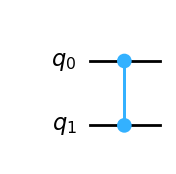

In [66]:
qc3 = QuantumCircuit(2)
qc3.cz(0, 1)
qc3.draw("mpl")

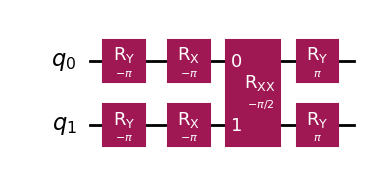

In [ ]:
a = -1
qc4 = QuantumCircuit(2)
qc4.ry(-PI/2, 0)
qc4.ry(a * PI/2, 1)

qc4.rx(-PI/2, 0)
qc4.rx(a * PI/2, 1)

qc4.rxx(a * PI/2, 0, 1)

qc4.ry(PI/2, 0)
qc4.ry(-a * PI/2, 1)


qc4.draw("mpl")



In [303]:
x = []
a1 = []
a2 = []
a3 = []
a4 = []
for theta in np.linspace(-PI, PI, 1000):
    x += [theta]
    qc = cz(theta)
    op = Operator(qc)
    op = op.data
    a1 += [op[0][0]]
    a2 += [op[1][1]]
    a3 += [op[2][2]]
    a4 += [op[3][3]]


/home/dan/CS_local/Quantum_Computing/final_project/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/dan/CS_local/Quantum_Computing/final_project/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


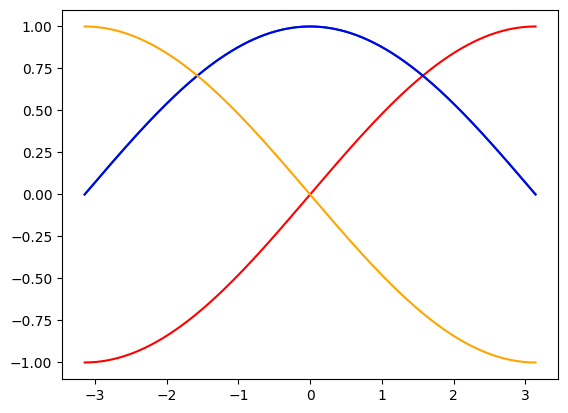

In [305]:
plt.figure()
plt.plot(x, a1, color='red', label='a1 (red)')   # Red line
plt.plot(x, a2, color='green', label='a2 (green)')  # Green line
plt.plot(x, a3, color='blue', label='a3 (blue)')  # Blue line
plt.plot(x, a4, color='orange', label='a4 (orange)')  # Fourth color (orange, optional)
plt.show()

In [311]:
op = Operator(qc4)
op2 = Operator(qc3)
print(op.data)


[[ 2.65122578e-33-7.07106781e-01j -4.32978028e-17-4.32978028e-17j
  -4.32978028e-17-4.32978028e-17j -7.07106781e-01+2.65122578e-33j]
 [-4.32978028e-17-4.32978028e-17j  1.32561289e-32-7.07106781e-01j
  -7.07106781e-01+2.65122578e-33j  1.29893408e-16-4.32978028e-17j]
 [-4.32978028e-17-4.32978028e-17j -7.07106781e-01+2.65122578e-33j
   1.32561289e-32-7.07106781e-01j  1.29893408e-16-4.32978028e-17j]
 [-7.07106781e-01+2.65122578e-33j  1.29893408e-16-4.32978028e-17j
   1.29893408e-16-4.32978028e-17j -1.85585805e-32-7.07106781e-01j]]


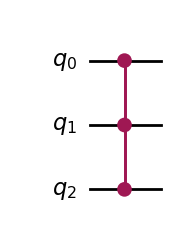

In [218]:
ccz = CCZGate()
qc = QuantumCircuit(3)

qc.append(ccz, [0, 1, 2])
# qc.save_statevector(label='psi_out')
qc.draw("mpl")

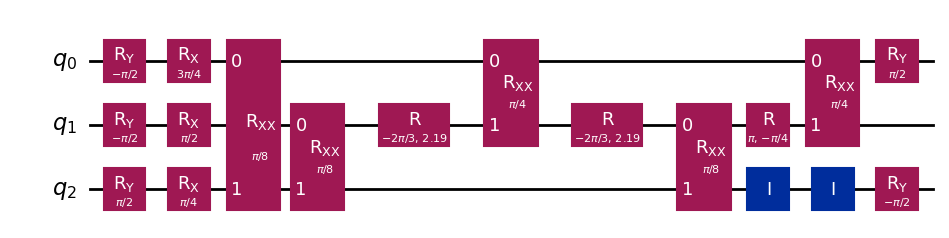

In [262]:
qc2 = QuantumCircuit(3)

qc2.ry(-PI / 2, 0)
qc2.ry(-PI / 2, 1)
qc2.ry(PI / 2, 2)

qc2.rx(3*PI / 4, 0)
qc2.rx(PI / 2, 1)
qc2.rx(PI / 4, 2)

qc2.rxx(PI / 8, 0, 2)

qc2.rxx(PI / 8, 1, 2)

qc2.r(-2*PI / 3, PI-P, 1)

qc2.rxx(PI / 4, 0, 1)

qc2.r(-2*PI / 3, PI - P, 1)
qc2.rxx(PI / 8, 1, 2)
qc2.r(PI, -PI / 4, 1)
qc2.rxx(PI / 4, 0, 1)
qc2.id(2)
qc2.id(2)
qc2.ry(PI / 2, 0)
qc2.ry(-PI / 2, 2)



# qc2.save_statevector(label='psi_out')
qc2.draw("mpl")

In [263]:
op_qc = Operator(qc)
op_qc2 = Operator(qc2)

In [265]:
print(op_qc2)

Operator([[-3.52442951e-01-6.28342330e-01j,
           -1.96261557e-17-5.88784672e-17j,
           -6.40728862e-01+2.65398584e-01j,
            5.88784672e-17-2.42861287e-17j,
           -1.21430643e-17-1.11022302e-16j,
            5.88784672e-17+6.16297582e-33j,
            0.00000000e+00+5.55111512e-17j,
           -4.85722573e-17-3.08148791e-33j],
          [ 1.96261557e-17-3.92523115e-17j,
           -4.45638540e-01-5.66071028e-01j,
           -1.96261557e-17+9.81307787e-18j,
            6.93519923e-01+1.42247325e-16j,
           -1.34929821e-17-3.92523115e-17j,
           -2.77555756e-17+5.55111512e-17j,
            1.96261557e-17+1.96261557e-17j,
            3.46944695e-17-5.55111512e-17j],
          [-4.90392640e-01+4.90392640e-01j,
            5.88784672e-17-5.88784672e-17j,
           -4.45638540e-01-5.66071028e-01j,
            3.92523115e-17+1.96261557e-17j,
            2.77555756e-17-2.77555756e-17j,
           -9.81307787e-17+4.90653893e-17j,
            2.77555756e-17+5.5

In [222]:
print(op_qc - op_qc2)

Operator([[ 1.35244295e+00+6.28342330e-01j,
            1.96261557e-17+5.88784672e-17j,
            6.40728862e-01-2.65398584e-01j,
           -5.88784672e-17+2.42861287e-17j,
            1.21430643e-17+1.11022302e-16j,
           -5.88784672e-17-6.16297582e-33j,
            0.00000000e+00-5.55111512e-17j,
            4.85722573e-17+3.08148791e-33j],
          [-1.96261557e-17+3.92523115e-17j,
            1.44563854e+00+5.66071028e-01j,
            1.96261557e-17-9.81307787e-18j,
           -6.93519923e-01-1.42247325e-16j,
            1.34929821e-17+3.92523115e-17j,
            2.77555756e-17-5.55111512e-17j,
           -1.96261557e-17-1.96261557e-17j,
           -3.46944695e-17+5.55111512e-17j],
          [ 4.90392640e-01-4.90392640e-01j,
           -5.88784672e-17+5.88784672e-17j,
            1.44563854e+00+5.66071028e-01j,
           -3.92523115e-17-1.96261557e-17j,
           -2.77555756e-17+2.77555756e-17j,
            9.81307787e-17-4.90653893e-17j,
           -2.77555756e-17-5.5

In [223]:
print(op_qc - op_qc2)

Operator([[ 1.35244295e+00+6.28342330e-01j,
            1.96261557e-17+5.88784672e-17j,
            6.40728862e-01-2.65398584e-01j,
           -5.88784672e-17+2.42861287e-17j,
            1.21430643e-17+1.11022302e-16j,
           -5.88784672e-17-6.16297582e-33j,
            0.00000000e+00-5.55111512e-17j,
            4.85722573e-17+3.08148791e-33j],
          [-1.96261557e-17+3.92523115e-17j,
            1.44563854e+00+5.66071028e-01j,
            1.96261557e-17-9.81307787e-18j,
           -6.93519923e-01-1.42247325e-16j,
            1.34929821e-17+3.92523115e-17j,
            2.77555756e-17-5.55111512e-17j,
           -1.96261557e-17-1.96261557e-17j,
           -3.46944695e-17+5.55111512e-17j],
          [ 4.90392640e-01-4.90392640e-01j,
           -5.88784672e-17+5.88784672e-17j,
            1.44563854e+00+5.66071028e-01j,
           -3.92523115e-17-1.96261557e-17j,
           -2.77555756e-17+2.77555756e-17j,
            9.81307787e-17-4.90653893e-17j,
           -2.77555756e-17-5.5

In [ ]:
def rx(theta):
    return np.array([
        [np.cos(theta/2), -1j* np.sin(theta/2)],
        [-1j* np.sin(theta/2), np.cos(theta/2)]
    ])

def ry(theta):
    return np.array([
        [np.cos(theta/2), -np.sin(theta/2)],
        [np.sin(theta/2), np.cos(theta/2)]
    ])

def rz(theta):
    return np.array([
        [np.exp(-1j* theta/2), 0],
        [0, np.exp(1j *theta/2)]
    ])

def rxx(theta):
    return np.array([
        [np.cos(theta), 0, 0, -1j * np.sin(theta)],
        [0, np.cos(theta), -1j * np.sin(theta), 0],
        [0, -1j * np.sin(theta), np.cos(theta),  0],
        [-1j * np.sin(theta), 0, 0, np.cos(theta)]
    ])

def i():
    return np.array([
        [1, 0],
        [0, 1]
    ])




In [363]:
rxx(PI/4)

array([[0.70710678+0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        -0.70710678j],
       [0.        +0.j        , 0.70710678+0.j        ,
        0.        -0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.        -0.70710678j,
        0.70710678+0.j        , 0.        +0.j        ],
       [0.        -0.70710678j, 0.        +0.j        ,
        0.        +0.j        , 0.70710678+0.j        ]])

In [358]:
s1 = np.kron(ry(PI/2), i())
s2 = rxx(PI/4)
s3 = np.kron(ry(-PI/2), rx(-PI/2))
s4 = np.kron(rz(-PI/2), i())
print((s4 @ s3 @ s2 @ s1))

[[ 7.07106781e-01+7.07106781e-01j -6.16297582e-33+6.16297582e-33j
   5.55111512e-17+1.62588398e-17j  7.85046229e-17-7.85046229e-17j]
 [-6.16297582e-33+6.16297582e-33j  7.07106781e-01+7.07106781e-01j
   7.85046229e-17-7.85046229e-17j  5.55111512e-17+1.62588398e-17j]
 [ 3.92523115e-17-5.88784672e-17j -3.92523115e-17-5.55111512e-17j
   1.17756934e-16-1.37383090e-16j  7.07106781e-01+7.07106781e-01j]
 [-3.92523115e-17-5.55111512e-17j  3.92523115e-17-5.88784672e-17j
   7.07106781e-01+7.07106781e-01j  1.17756934e-16-1.37383090e-16j]]


In [349]:
stage_1 = np.kron(ry(-PI/2), ry(PI/2))
stage_2 = np.kron(rx(-PI/2), rx(PI/2))
stage_3 = rxx(PI/4)
stage_4 = np.kron(ry(PI/2), ry(-PI/2))

print((stage_4 @ stage_3 @ stage_2 @ stage_1))

[[ 7.07106781e-01-7.07106781e-01j  2.77555756e-17-2.77555756e-17j
   0.00000000e+00+0.00000000e+00j -1.14967359e-17+1.14967359e-17j]
 [-1.14967359e-17+1.14967359e-17j  7.07106781e-01-7.07106781e-01j
   0.00000000e+00+0.00000000e+00j -1.22519038e-16+1.22519038e-16j]
 [ 1.14967359e-17-1.14967359e-17j  0.00000000e+00+0.00000000e+00j
   7.07106781e-01-7.07106781e-01j  1.22519038e-16-1.22519038e-16j]
 [-1.14967359e-17+1.14967359e-17j -1.11022302e-16+1.11022302e-16j
   1.38777878e-16-1.38777878e-16j -7.07106781e-01+7.07106781e-01j]]
